In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.utils import resample


In [2]:
telecom_dataset = pd.read_csv('telecom_users.csv', encoding='utf-8')




The column TotalCharges contains some empty cells. On close observation, these rows correspond to customers with 0 tenure, therefore we put the TotalCharges values as 0 for them

In [3]:
telecom_dataset['TotalCharges']=pd.to_numeric(telecom_dataset['TotalCharges'], errors='coerce')
telecom_dataset['TotalCharges'] = telecom_dataset['TotalCharges'].fillna(0)

Now we plot some of the categorical variables and see their distributions with respect to the churn label

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

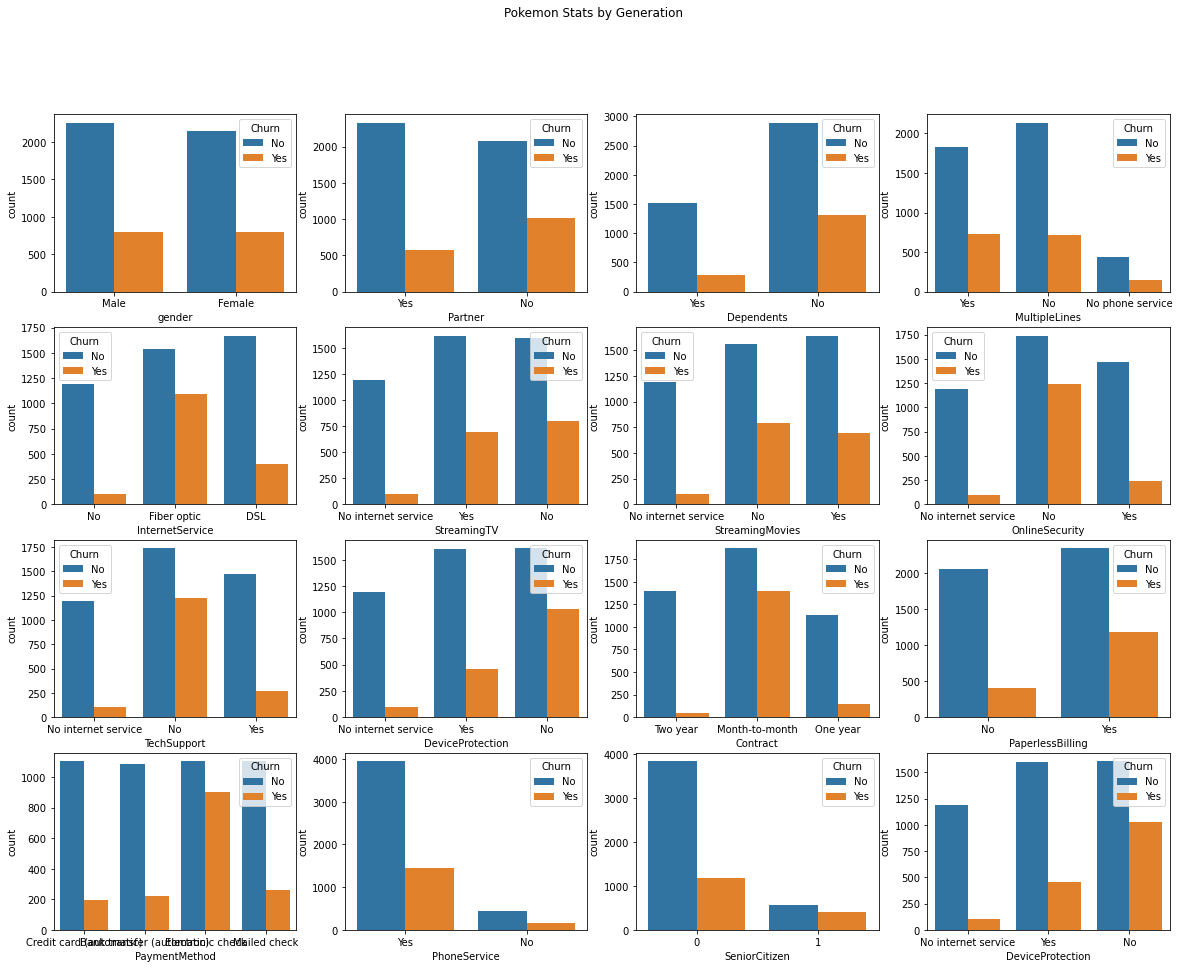

In [12]:
#plt.figure(figsize = (4,3))
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
fig.suptitle('Pokemon Stats by Generation')
sns.countplot(ax=axes[0, 0], data=telecom_dataset, x='gender', hue='Churn')
sns.countplot(ax=axes[0, 1], data=telecom_dataset, x='Partner', hue='Churn')
sns.countplot(ax=axes[0, 2], data=telecom_dataset, x='Dependents', hue='Churn')
sns.countplot(ax=axes[0, 3], data=telecom_dataset, x='MultipleLines', hue='Churn')
sns.countplot(ax=axes[1, 0], data=telecom_dataset, x='InternetService', hue='Churn')
sns.countplot(ax=axes[1, 1], data=telecom_dataset, x='StreamingTV', hue='Churn')
sns.countplot(ax=axes[1, 2], data=telecom_dataset, x='StreamingMovies', hue='Churn')
sns.countplot(ax=axes[1, 3], data=telecom_dataset, x='OnlineSecurity', hue='Churn')
sns.countplot(ax=axes[2, 0], data=telecom_dataset, x='TechSupport', hue='Churn')
sns.countplot(ax=axes[2, 1], data=telecom_dataset, x='DeviceProtection', hue='Churn')
sns.countplot(ax=axes[2, 2], data=telecom_dataset, x='Contract', hue='Churn')
sns.countplot(ax=axes[2, 3], data=telecom_dataset, x='PaperlessBilling', hue='Churn')
sns.countplot(ax=axes[3, 0], data=telecom_dataset, x='PaymentMethod', hue='Churn')
sns.countplot(ax=axes[3, 1], data=telecom_dataset, x='PhoneService', hue='Churn')
sns.countplot(ax=axes[3, 2], data=telecom_dataset, x='SeniorCitizen', hue='Churn')
sns.countplot(ax=axes[3, 3], data=telecom_dataset, x='DeviceProtection', hue='Churn')





It can be noted that the variables Device Protection, Tech Support, Contract, StreamingMovies, StreamingTV, InternetService and OnlineSecurity have a category each which has a very high chances of getting a no value for Churn. 
We convert our categorical labels to dummy variables. For the remaining, we assign 0 to No and 1 to Yes 

In [13]:
df=pd.get_dummies(data=telecom_dataset, columns=['Contract','PaymentMethod','InternetService','TechSupport',
                                                 'StreamingTV','StreamingMovies','OnlineBackup'], drop_first=True)
df=df.replace('Yes',1)
df=df.replace('No',0)
df=df.replace('No internet service',0)
df=df.replace('No phone service',0)
df=df.replace('Male',1)
df=df.replace('Female',0)
df1=df

labels=df1['Churn']
df1=df1.drop(['customerID','Unnamed: 0'],axis=1)


Next we observe the Co-relation of the variables with respect to the churn variable to figure out which variables have a higher impact on the change in value of churn. We select variables which have an absolute corelation of atleast 0.1

<AxesSubplot:>

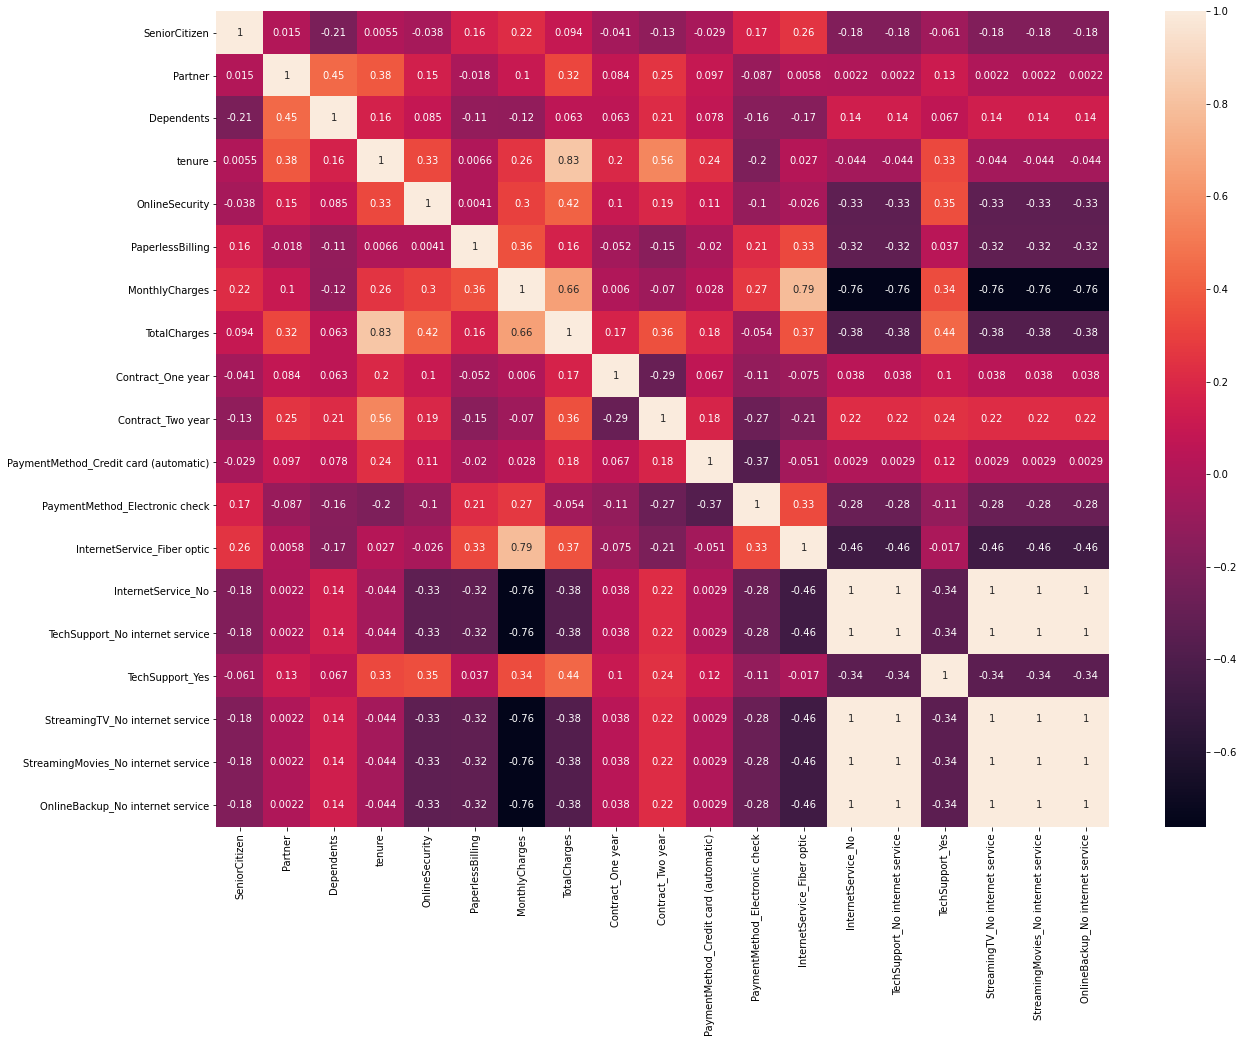

In [27]:
columns_corr=df1.columns[abs(df1.corr()['Churn'])>0.1]
df1=df1[columns_corr]
plt.figure(figsize=(20,15))
sns.heatmap(df1.drop('Churn',axis=1).corr(), annot=True)

In [ ]:
#PCA can be implemented to further perform a dimenssion reduction if required.
# pca_df=df1.drop(['Churn'], axis=1)

# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(pca_df)
# principalDf = pd.DataFrame(data = principalComponents)

In [16]:
train,test = train_test_split(df1, test_size=0.2,random_state=42)
train['Churn'].value_counts()

0    3504
1    1284
Name: Churn, dtype: int64

There is a class imbalance which we need to resolve. We can perform an upsampling of the minority class. Or use create a dictionary with the relevant weihts with respect to class ratio and use that as a weighted-training of the model 

In [23]:
# Upsample minority class
#df_majority = train[train['Churn']==0]
#df_minority = train[train['Churn']==1]
#df_minority_upsampled = resample(df_minority, 
#                                   replace=True,     # sample with replacement
#                                   n_samples=3504,    # to match majority class
#                                   random_state=123) # reproducible results

#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#df_upsampled['Churn'].value_counts()

class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train['Churn']),
                                                  train['Churn'])

class_weight_dict = {0: class_weights[0],1: class_weights[1]}

C:\Users\majidfy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=5737    0
829     1
2694    1
1496    0
438     0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Churn, Length: 4788, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [28]:
scaler1 = MinMaxScaler()
scaler = StandardScaler()

train_labels=train['Churn']
train_data=train.drop(['Churn','TotalCharges'],axis=1)
train_data = scaler.fit_transform(train_data)
train_data = scaler1.fit_transform(train_data)

test_labels=test['Churn']
test_data=test.drop(['Churn','TotalCharges'],axis=1)
test_data = scaler.fit_transform(test_data)
test_data = scaler1.fit_transform(test_data)

In [29]:
clf = LogisticRegression(random_state=0, penalty = 'l2', max_iter=1000, class_weight=class_weight_dict)
# clf = svm.SVC()
# clf = SVC(kernel='linear', 
#             class_weight=class_weight_dict, # penalize
#             probability=True)
# clf = RidgeClassifier()
# clf = RandomForestClassifier(max_depth=10, max_features='auto',random_state=0)

clf.fit(train_data, train_labels)

LogisticRegression(class_weight={0: 0.6832191780821918, 1: 1.8644859813084111},
                   max_iter=1000, random_state=0)

In [31]:
predictions=clf.predict(test_data)
print(confusion_matrix(test_labels, predictions))

target_names = ['class 0', 'class 1']
print(classification_report(test_labels, predictions, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
print('AUC Score:',metrics.auc(fpr, tpr))

[[644 251]
 [ 68 235]]
              precision    recall  f1-score   support

     class 0       0.90      0.72      0.80       895
     class 1       0.48      0.78      0.60       303

    accuracy                           0.73      1198
   macro avg       0.69      0.75      0.70      1198
weighted avg       0.80      0.73      0.75      1198

AUC Score: 0.7475653151907369
